<h1><center>Profitable app profile for the Google Play Store</center></h1> 
<img src="https://buildfire.com/wp-content/uploads/2017/11/what-type-of-apps-make-the-most-money-a-data-driven-answer-1200x900.jpg" width=500/>

The purpose of this project is to analyze possible factors that make an app popular on Google Play Store, based on sample data collected in 2017 which contains details of more than ten thousand android apps. The sample data can be downloaded from [this link](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

Our company wants to build an android app that is free to download and install; the source of revenue will come from in-app ads. This means that the number of active users of our app determines our revenue - the more users engage with the ads, the better. Our goal as a data analyst is to help developers understand what kind of apps are more likely to attract users in order to build a profitable app.

In this project, we'll go through a process of cleaning the data, analyzing it to find patterns, and visualizing cleaned data at the last step to make it clearer and easier for stakeholders to understand and make a data-driven decision.

## I. Open and explore the data 

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
android = pd.read_csv('googleplaystore.csv')

In [3]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## II. Clean data

In [5]:
# Update column names: convert to lowercase and replace space with underscore

android.columns = android.columns.str.lower()
android.columns = android.columns.str.replace(' ', "_")
android.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

In [6]:
# Check whether there's any record with an invalid rating (rating > 5) 

android[android.rating > 5]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
# Remove the invalid record with rating > 5

android = android.drop (index = 10472)

### 1. Handling duplicates

In [8]:
# Find duplicate records (records with same app name)

duplicate_android = android[android.duplicated(['app'])]
duplicate_android.head(10)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [9]:
# Randomly check one/ some app(s) to see whether there's any difference in those duplicate records

android[android.app == 'Quick PDF Scanner + OCR FREE']

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


<p style='background:yellow'>We can see that the only difference is the 4th column, which is the number of reviews. To avoid deleting data randomly, we'll use this column as a criterion to do it. A record with the highest number of reviews likely to be collected most recently, so we'll keep these records and delete others.</p>

In the next steps, we will:
1. Create an empty dictionary to store the result (the list of unique app with highest number of reviews)
2. Create a list of unique apps from the original android list
3. Loop through the unique apps list, sort the reviews column in descending order, and select the first row (highest reviews)
4. Assign the result at the step 3 to the dictionary at step 1
5. Convert the dictionary back to dataframe type

In [10]:
highest_review = {}
uniq_apps = android['app'].unique()

for app in uniq_apps:
    selected_record = android[android['app'] == app].sort_values('reviews', ascending = False).iloc[0]
    highest_review[app] = selected_record

In [11]:
# Convert the highest_review dict to dataframe

android=pd.DataFrame.from_dict(highest_review, orient='index')

android
len(android)

9659

### 2. Removing non-English apps

As all alphabetical characters are encoded using the ASCII standard, each ASCII character is assigned a number between 0 and 127, we'll make use of this to build a function that checks an app name and detect whether it contains non-ASCII characters.

In [12]:
# Create a function to check whether the input contains non-ASCII characters

def is_english(name):
    for char in name:
        if ord(char) > 127:
            return False
    return True
        
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

False


In [13]:
print(is_english('Docs To Go™ Free Office Suite'))

False


<p style='background:yellow'>This function works even when there's one non-ASCII character the inputted string. For those English apps which contain at least one symbol in the name, for example: "Docs To Go**™** Free Office Suite", it will also return False. Because of this, if we use this function, we might remove some useful data. 
To minimize the amount of data loss, we'll update our function to only remove an app if its name has more than three non-ASCII characters.</p>

In [14]:
def is_english(name):
    count = 0
    for char in name:
        if ord(char) > 127:
            count += 1
    if count > 3:
        return False
    else:
        return True
        
print(is_english('Docs To Go™ Free Office Suite'))

True


#### Apply the function

In [15]:
# Create a new column to apply the function

android['is_english'] = android['app'].apply(is_english)
android.head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,is_english
Photo Editor & Candy Camera & Grid & ScrapBook,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,True
Coloring book moana,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,True
"U Launcher Lite – FREE Live Cool Themes, Hide Apps","U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,True


In [16]:
print(len(android.is_english[android['is_english']== False]))

45


In [17]:
# Remove records with non-English name

android.drop(android[android.is_english==False].index, inplace = True)

print(len(android.is_english[android['is_english']== False]))
print(len(android))

0
9614


In [18]:
# Delete column "is_english"

android.drop(['is_english'], axis = 1, inplace = True)

android.head(3)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
Photo Editor & Candy Camera & Grid & ScrapBook,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps","U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### 3. Removing non-free apps

In [19]:
# Convert datatype of the "price" columns to float

android.price = android.price.str.replace('$','')
android.price = android.price.astype(float)

android.price.describe()

count    9614.000000
mean        1.061126
std        16.393744
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: price, dtype: float64

In [20]:
# Remove non-free apps
android = android[android['price']==0]

len(android)

8862

**From the original 10841 records, now we are left with 8862 apps to analyse**

## III. Analyse data

Our dataset has total of 13 columns but not all of them are useful for this project. Let's print out the columns again and identify key columns.

In [21]:
android.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver'],
      dtype='object')

<p style='background:yellow'>For this analysis, below are the key columns that we will select for further analyse:
<br>- category
<br>- rating
<br>- reviews
<br>- installs
</p>

### 1. Most common categories on Google Play Store

Let's take a look at the top 10 common categories to see which kind of apps are dominating Google Play Store.

In [22]:
# Calculate the percentage of top 10 categories on GG Play Store

most_common = round(android['category'].value_counts()/len(android)*100,2)
top10_common = most_common.head(10)
top10_common

FAMILY             18.93
GAME                9.69
TOOLS               8.45
BUSINESS            4.59
LIFESTYLE           3.90
PRODUCTIVITY        3.89
FINANCE             3.70
MEDICAL             3.52
SPORTS              3.40
PERSONALIZATION     3.32
Name: category, dtype: float64

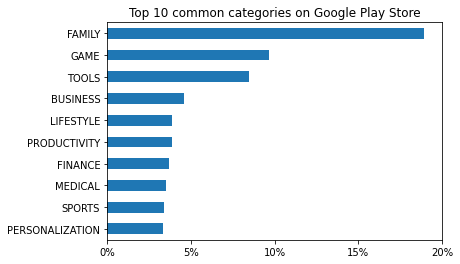

In [23]:
top10_common.sort_values(ascending = True, inplace=True)
top10_common.plot.barh()
plt.title('Top 10 common categories on Google Play Store')
plt.xticks([0, 5, 10,15,20],['0%', '5%', '10%','15%','20%'])
plt.show()

<p style='background:yellow'>We can see that among the top ten list, the "Family" category accounts for the highest percentage (close to 19%), followed by "Game" (9.69) and "Tools" (8.45%). The rest of the list is less than 5%.  But we need to take into account that an app that belongs to the most common categories doesn't also imply that they have the biggest number of users because the supply could be higher than the demand.</p>

### 2. App's categories with the highest average rating

In [24]:
high_rating = android.groupby('category').mean('rating').sort_values('rating', ascending = False)
high_rating.head(10)

,rating,price
category,,
EVENTS,4.435556,0.0
BOOKS_AND_REFERENCE,4.347799,0.0
EDUCATION,4.344660,0.0
PARENTING,4.339583,0.0
ART_AND_DESIGN,4.338182,0.0
PERSONALIZATION,4.300000,0.0
BEAUTY,4.278571,0.0
SOCIAL,4.252736,0.0
HEALTH_AND_FITNESS,4.236052,0.0


<p style='background:yellow'>In general, we can see that there's not much difference among the rating of the top ten categories (from 4.23 to 4.43), so we can ignore this field for now and focus on analyzing the other remaining factors.</p>

### 3. App's categories with the highest average number of reviews

In [25]:
# Convert datatype of the "revies" columns to float
android.reviews = android.reviews.astype(float)

# Top 10 most reviewed categories
most_reviewed = android.groupby('category').mean('reviews').sort_values('reviews', ascending = False)
top10_reviewed = most_reviewed.reviews.head(10)
top10_reviewed

category
COMMUNICATION      995608.463415
SOCIAL             965830.987288
GAME               683839.718277
VIDEO_PLAYERS      425350.081761
PHOTOGRAPHY        403207.402299
TOOLS              306086.652870
ENTERTAINMENT      301752.247059
SHOPPING           223887.346734
PERSONALIZATION    181122.316327
WEATHER            171250.774648
Name: reviews, dtype: float64

<AxesSubplot:ylabel='category'>

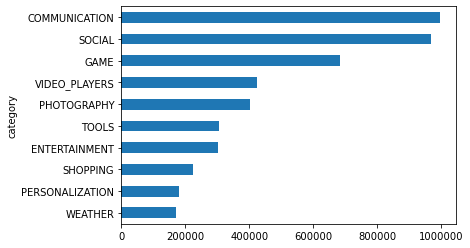

In [26]:
top10_reviewed.sort_values(ascending = True, inplace=True)
plt.ticklabel_format(style='plain')

top10_reviewed.plot.barh()

### 4. App's categories with the highest average number of installs

In [27]:
# Convert datatype of the "installs" columns to float

android.installs = android.installs.str.replace('+','')
android.installs = android.installs.str.replace(',','')
android.installs = android.installs.astype(float)

android.installs

Photo Editor & Candy Camera & Grid & ScrapBook           10000.0
Coloring book moana                                     500000.0
U Launcher Lite – FREE Live Cool Themes, Hide Apps     5000000.0
Sketch - Draw & Paint                                 50000000.0
Pixel Draw - Number Art Coloring Book                   100000.0
                                                         ...    
Sya9a Maroc - FR                                          5000.0
Fr. Mike Schmitz Audio Teachings                           100.0
Parkinson Exercices FR                                    1000.0
The SCP Foundation DB fr nn5n                             1000.0
iHoroscope - 2018 Daily Horoscope & Astrology         10000000.0
Name: installs, Length: 8862, dtype: float64

In [28]:
# Top 10 most installed categories

most_installed = android.groupby('category').mean('installs').sort_values('installs', ascending = False)
top10_installed = most_installed.installs.head(10)

top10_installed

category
COMMUNICATION         3.845612e+07
VIDEO_PLAYERS         2.472787e+07
SOCIAL                2.325365e+07
PHOTOGRAPHY           1.780563e+07
PRODUCTIVITY          1.678733e+07
GAME                  1.556097e+07
TRAVEL_AND_LOCAL      1.398408e+07
ENTERTAINMENT         1.164071e+07
TOOLS                 1.068230e+07
NEWS_AND_MAGAZINES    9.549178e+06
Name: installs, dtype: float64

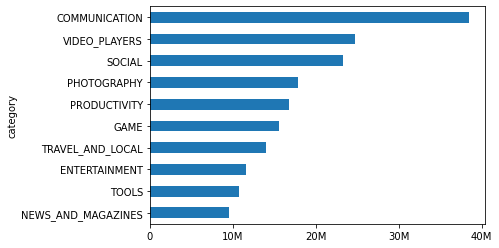

In [29]:
top10_installed.sort_values(ascending = True, inplace=True)
plt.ticklabel_format(style='plain')

top10_installed.plot.barh()
plt.xticks([0, 10000000,20000000,30000000,40000000],['0','10M','20M','30M','40M'])
plt.show()

### 5. Identify the best category to develop a new app

#### Let's put together the 3 graphs of most common, most reviewed, and most installed categories to find the room for our company's new app

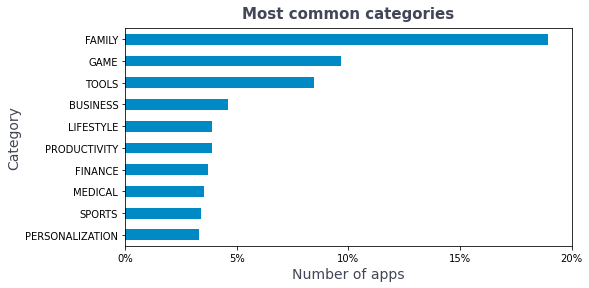

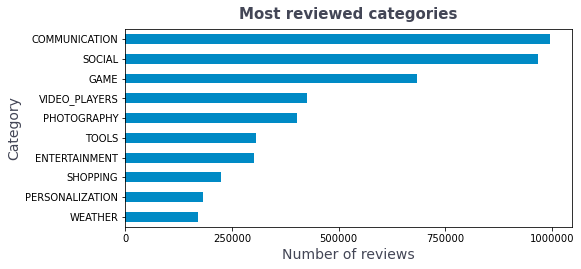

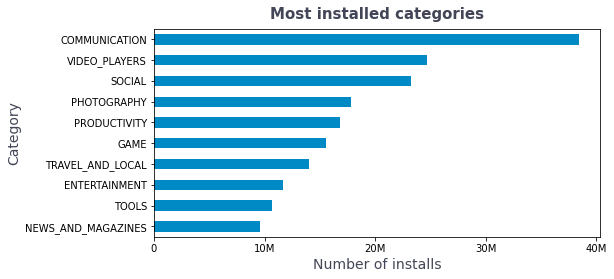

In [30]:
plt.figure(figsize=(8, 4))
plt.subplot(1,1,1)
top10_common.plot.barh(color='#008AC5')
plt.xticks([0, 5, 10,15,20],['0%', '5%', '10%','15%','20%'])
plt.title('Most common categories', fontsize=15, fontweight="bold",color='#434656', pad=10)
plt.xlabel('Number of apps',fontsize=14,color='#434656')
plt.ylabel('Category',fontsize=14,color='#434656')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.ticklabel_format(style='plain')
top10_reviewed.plot.barh(color='#008AC5')
plt.xticks([0, 250000,500000,750000,1000000],['0', '250000','500000','750000','1000000'])
plt.title('Most reviewed categories', fontsize=15,fontweight="bold",color='#434656', pad=10)
plt.xlabel('Number of reviews',fontsize=14,color='#434656')
plt.ylabel('Category',fontsize=14,color='#434656')
plt.show()

plt.figure(figsize=(8, 13))
plt.subplot(3,1,1)
top10_installed.plot.barh(color='#008AC5')
plt.xticks([0, 10000000,20000000,30000000,40000000],['0','10M','20M','30M','40M'])
plt.title('Most installed categories', fontsize=15,fontweight="bold",color='#434656', pad=10)
plt.xlabel('Number of installs',fontsize=14,color='#434656')
plt.ylabel('Category',fontsize=14,color='#434656')
plt.show()

<p style='background:yellow'>The first impression is the that five categories that appear in both "Most reviewed" and "Most installed" graphs and also at the top 5 of both graphs are Communication, Social, Game, Video Players, Photography. Let's take a more detailed look at each category to see what kinds of apps belong to it and how many reviews/ installed they have. </p>

**1. COMMUNICATION category**

In [31]:
android2 = android[['app','category','reviews','installs']]
top_communication = android2[android2['category'] == 'COMMUNICATION'].sort_values('reviews', ascending = False)
top_communication

,app,category,reviews,installs
WhatsApp Messenger,WhatsApp Messenger,COMMUNICATION,69119316.0,1.000000e+09
Messenger – Text and Video Chat for Free,Messenger – Text and Video Chat for Free,COMMUNICATION,56646578.0,1.000000e+09
UC Browser - Fast Download Private & Secure,UC Browser - Fast Download Private & Secure,COMMUNICATION,17714850.0,5.000000e+08
BBM - Free Calls & Messages,BBM - Free Calls & Messages,COMMUNICATION,12843436.0,1.000000e+08
Viber Messenger,Viber Messenger,COMMUNICATION,11335481.0,5.000000e+08
...,...,...,...,...
Carpooling FH Hagenberg,Carpooling FH Hagenberg,COMMUNICATION,0.0,1.000000e+02
Oklahoma Ag Co-op Council,Oklahoma Ag Co-op Council,COMMUNICATION,0.0,1.000000e+01
Test Server SMS FA,Test Server SMS FA,COMMUNICATION,0.0,5.000000e+00
Ek IRA,Ek IRA,COMMUNICATION,0.0,1.000000e+01


#### Let's see some rows in the middle of the list.

In [32]:
top_communication[140:150]

,app,category,reviews,installs
Adblock Plus for Samsung Internet - Browse safe.,Adblock Plus for Samsung Internet - Browse safe.,COMMUNICATION,8769.0,1000000.0
AW - free video calls and chat,AW - free video calls and chat,COMMUNICATION,7317.0,1000000.0
"U - Webinars, Meetings & Messenger","U - Webinars, Meetings & Messenger",COMMUNICATION,6601.0,500000.0
AT&T Call Protect,AT&T Call Protect,COMMUNICATION,6454.0,5000000.0
"Talkie - Wi-Fi Calling, Chats, File Sharing","Talkie - Wi-Fi Calling, Chats, File Sharing",COMMUNICATION,4838.0,500000.0
Goodbox - Mega App,Goodbox - Mega App,COMMUNICATION,3429.0,100000.0
AT&T Messages for Tablet,AT&T Messages for Tablet,COMMUNICATION,3044.0,1000000.0
Antillean Gold Telegram (original version),Antillean Gold Telegram (original version),COMMUNICATION,2939.0,100000.0
TownWiFi | Wi-Fi Everywhere,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,2372.0,500000.0
PlacarTv Futebol Ao Vivo,PlacarTv Futebol Ao Vivo,COMMUNICATION,2063.0,100000.0


#### Let's do a quick calculation to see the difference in the number of reviews between the 1st and one of the apps in the middle of the list.

In [33]:
int(top_communication[top_communication.app == 'WhatsApp Messenger'].reviews)/int(top_communication[top_communication.app == 'Adblock Plus for Samsung Internet - Browse safe.'].reviews)

7882.234690386589

In [34]:
# Difference in the number of installs between the 1st and one of the apps in the middle of the list.

int(top_communication[top_communication.app == 'WhatsApp Messenger'].installs)/int(top_communication[top_communication.app == 'Adblock Plus for Samsung Internet - Browse safe.'].installs)

1000.0

<p style='background:yellow'>We can see that the number of reviews of WhatsApp and Messenger is 5-7 times higher than the 3rd app in the list, and the top 10 apps clearly have much higher reviews and installs than those are in the middle and the rest of the list. The average number was brought up to a higher number than it should be, so the result seems to be skewed.</p>

**2. SOCIAL category**

In [35]:
top_social = android2[android2['category'] == 'SOCIAL'].sort_values('reviews', ascending = False)
top_social.head

<bound method NDFrame.head of                            app category     reviews      installs
Facebook              Facebook   SOCIAL  78158306.0  1.000000e+09
Instagram            Instagram   SOCIAL  66577446.0  1.000000e+09
Snapchat              Snapchat   SOCIAL  17015352.0  5.000000e+08
Facebook Lite    Facebook Lite   SOCIAL   8606259.0  5.000000e+08
VK                          VK   SOCIAL   5793284.0  1.000000e+08
...                        ...      ...         ...           ...
bm-Events            bm-Events   SOCIAL         0.0  1.000000e+01
Reisedealz.eu    Reisedealz.eu   SOCIAL         0.0  1.000000e+01
Rejoin Your Ex  Rejoin Your Ex   SOCIAL         0.0  1.000000e+02
Amleen Ey            Amleen Ey   SOCIAL         0.0  1.000000e+00
quran-DZ              quran-DZ   SOCIAL         0.0  1.000000e+01

[236 rows x 4 columns]>

In [36]:
# Middle rows
top_social[120:130]

,app,category,reviews,installs
Patook - make platonic friends,Patook - make platonic friends,SOCIAL,3677.0,100000.0
Gayvox - Gay Lesbian Bi Dating,Gayvox - Gay Lesbian Bi Dating,SOCIAL,3640.0,500000.0
Eddsworld Amino,Eddsworld Amino,SOCIAL,3071.0,10000.0
MB Notifications for FB (Free),MB Notifications for FB (Free),SOCIAL,3047.0,100000.0
YAY - TBH,YAY - TBH,SOCIAL,2520.0,100000.0
Web Browser ( Fast & Secure Web Explorer),Web Browser ( Fast & Secure Web Explorer),SOCIAL,2508.0,500000.0
Dating.dk,Dating.dk,SOCIAL,2111.0,100000.0
FutureNet your social app,FutureNet your social app,SOCIAL,2093.0,100000.0
Dr B R Ambedkar (Jai Bhim),Dr B R Ambedkar (Jai Bhim),SOCIAL,2068.0,100000.0
uCiC- Videos and Photos on demand,uCiC- Videos and Photos on demand,SOCIAL,2052.0,100000.0


In [37]:
# Difference in the number of reviews between the 1st and one of the apps in the middle of the list.

int(top_social[top_social.app == 'Facebook'].reviews)/int(top_social[top_social.app == 'Patook - make platonic friends'].reviews)

21255.998368234974

In [38]:
# Difference in the number of installs between the 1st and one of the apps in the middle of the list.

int(top_social[top_social.app == 'Facebook'].installs)/int(top_social[top_social.app == 'Patook - make platonic friends'].installs)

10000.0

<p style='background:yellow'>We can also see the same pattern here for the social category, where the market seems to be dominated by some giant apps (like Facebook, Instagram, Snapchat, etc..) which have tens of millions of user ratings, while the other apps may struggle to get past the 10,000 threshold.</p>

**3. GAME category**

In [39]:
top_game = android2[android2['category'] == 'GAME'].sort_values('reviews', ascending = False)
top_game

,app,category,reviews,installs
Clash of Clans,Clash of Clans,GAME,44893888.0,1.000000e+08
Subway Surfers,Subway Surfers,GAME,27725352.0,1.000000e+09
Clash Royale,Clash Royale,GAME,23136735.0,1.000000e+08
Candy Crush Saga,Candy Crush Saga,GAME,22430188.0,5.000000e+08
My Talking Tom,My Talking Tom,GAME,14892469.0,5.000000e+08
...,...,...,...,...
Nedir Bu ?,Nedir Bu ?,GAME,0.0,1.000000e+01
Simple x3DS Emulator - BETA,Simple x3DS Emulator - BETA,GAME,0.0,5.000000e+04
Cyborg AX-001,Cyborg AX-001,GAME,0.0,5.000000e+01
Animal Hunting: Sniper Shooting,Animal Hunting: Sniper Shooting,GAME,0.0,5.000000e+01


In [40]:
# Middle rows
top_game[420:430]

,app,category,reviews,installs
RC Monster Truck - Offroad Driving Simulator,RC Monster Truck - Offroad Driving Simulator,GAME,38448.0,5000000.0
Bounce Classic,Bounce Classic,GAME,38297.0,10000000.0
Cops N Robbers,Cops N Robbers,GAME,37789.0,1000000.0
Sky Streaker - Gumball,Sky Streaker - Gumball,GAME,37513.0,5000000.0
Solitaire: Decked Out Ad Free,Solitaire: Decked Out Ad Free,GAME,37302.0,500000.0
Once Upon a Tower,Once Upon a Tower,GAME,37139.0,1000000.0
Paint Hit,Paint Hit,GAME,37023.0,10000000.0
iSniper 3D Arctic Warfare,iSniper 3D Arctic Warfare,GAME,35572.0,1000000.0
Motocross Mayhem,Motocross Mayhem,GAME,35171.0,1000000.0
Super Jabber Jump 3,Super Jabber Jump 3,GAME,34494.0,5000000.0


In [41]:
# Difference in the number of reviews between the 1st and one of the apps in the middle of the list.

int(top_game[top_game.app == 'Subway Surfers'].reviews)/int(top_game[top_game.app == 'RC Monster Truck - Offroad Driving Simulator'].reviews)

721.1129837702871

In [42]:
# Difference in the number of installs between the 1st and one of the apps in the middle of the list.

int(top_game[top_game.app == 'Subway Surfers'].installs)/int(top_game[top_game.app == 'RC Monster Truck - Offroad Driving Simulator'].installs)

200.0

<p style='background:yellow'>This category seems to be much less skewed. But if we go back to the first graph of most common categories, we can see that Game app already accounts for approximately 10% of Google Play Store (the second-highest common in the list), so it can be difficult for our company to acquire new customers. Let's continue to see if we can find a better category to develop. </p>

**4. VIDEO_PLAYERS category**

In [43]:
top_video_players = android2[android2['category'] == 'VIDEO_PLAYERS'].sort_values('reviews', ascending = False)
top_video_players

,app,category,reviews,installs
YouTube,YouTube,VIDEO_PLAYERS,25655305.0,1.000000e+09
VivaVideo - Video Editor & Photo Movie,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,9879473.0,1.000000e+08
MX Player,MX Player,VIDEO_PLAYERS,6474672.0,5.000000e+08
"VideoShow-Video Editor, Video Maker, Beauty Camera","VideoShow-Video Editor, Video Maker, Beauty Ca...",VIDEO_PLAYERS,4016834.0,1.000000e+08
"DU Recorder – Screen Recorder, Video Editor, Live","DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,2588730.0,5.000000e+07
...,...,...,...,...
List iptv FR,List iptv FR,VIDEO_PLAYERS,1.0,1.000000e+02
CI Stream,CI Stream,VIDEO_PLAYERS,0.0,1.000000e+01
BG MUSIC PLAYER - MUSIC PLAYER,BG MUSIC PLAYER - MUSIC PLAYER,VIDEO_PLAYERS,0.0,1.000000e+02
Bx-WiFi-GI,Bx-WiFi-GI,VIDEO_PLAYERS,0.0,1.000000e+02


In [44]:
# Middle rows
top_video_players[70:80]

,app,category,reviews,installs
XX HD Video downloader-Free Video Downloader,XX HD Video downloader-Free Video Downloader,VIDEO_PLAYERS,7624.0,1000000.0
All Video Downloader 2018,All Video Downloader 2018,VIDEO_PLAYERS,7557.0,1000000.0
DS photo,DS photo,VIDEO_PLAYERS,7335.0,1000000.0
DR TV,DR TV,VIDEO_PLAYERS,6716.0,500000.0
Video Status,Video Status,VIDEO_PLAYERS,6685.0,1000000.0
HTC Service—Video Player,HTC Service—Video Player,VIDEO_PLAYERS,6449.0,5000000.0
iPlayIT for YouTube VR Player,iPlayIT for YouTube VR Player,VIDEO_PLAYERS,5879.0,1000000.0
iSmart DV,iSmart DV,VIDEO_PLAYERS,5692.0,1000000.0
VPlayer,VPlayer,VIDEO_PLAYERS,5639.0,1000000.0
OnePlus Gallery,OnePlus Gallery,VIDEO_PLAYERS,5555.0,1000000.0


In [45]:
# Difference in the number of reviews between the 1st and one of the apps in the middle of the list.

int(top_video_players[top_video_players.app == 'YouTube'].reviews)/int(top_video_players[top_video_players.app == 'XX HD Video downloader-Free Video Downloader'].reviews)

3365.07148478489

In [46]:
# Difference in the number of installs between the 1st and one of the apps in the middle of the list.

int(top_video_players[top_video_players.app == 'YouTube'].installs)/int(top_video_players[top_video_players.app == 'XX HD Video downloader-Free Video Downloader'].installs)

1000.0

<p style='background:yellow'>We see the pattern again for the video players category, with some top apps having millions of reviews, which are thousands of times higher than some apps in the middle of the list. The market is dominated by apps like Youtube, VivaVideo, or MX Player.</p>

**5. PHOTOGRAPHY category**

In [47]:
top_photography = android2[android2['category'] == 'PHOTOGRAPHY'].sort_values('reviews', ascending = False)
top_photography

,app,category,reviews,installs
Google Photos,Google Photos,PHOTOGRAPHY,10859051.0,1.000000e+09
PicsArt Photo Studio: Collage Maker & Pic Editor,PicsArt Photo Studio: Collage Maker & Pic Editor,PHOTOGRAPHY,7594559.0,1.000000e+08
"PhotoGrid: Video & Pic Collage Maker, Photo Editor","PhotoGrid: Video & Pic Collage Maker, Photo Ed...",PHOTOGRAPHY,7529865.0,1.000000e+08
Retrica,Retrica,PHOTOGRAPHY,6120977.0,1.000000e+08
B612 - Beauty & Filter Camera,B612 - Beauty & Filter Camera,PHOTOGRAPHY,5282578.0,1.000000e+08
...,...,...,...,...
Touch DV,Touch DV,PHOTOGRAPHY,1.0,5.000000e+01
AI Image Recognizer (beta),AI Image Recognizer (beta),PHOTOGRAPHY,0.0,5.000000e+02
BG Editor,BG Editor,PHOTOGRAPHY,0.0,5.000000e+00
LC-DB-LITE,LC-DB-LITE,PHOTOGRAPHY,0.0,1.000000e+02


In [48]:
# Middle rows
top_photography[130:140]

,app,category,reviews,installs
"Selfie Camera: Beauty Camera, Photo Editor,Collage","Selfie Camera: Beauty Camera, Photo Editor,Col...",PHOTOGRAPHY,31985.0,1000000.0
Camera51 - a smarter camera,Camera51 - a smarter camera,PHOTOGRAPHY,29707.0,1000000.0
Change photo background,Change photo background,PHOTOGRAPHY,28660.0,5000000.0
Photo Frames,Photo Frames,PHOTOGRAPHY,28578.0,10000000.0
Ghost In Photo,Ghost In Photo,PHOTOGRAPHY,28429.0,5000000.0
Adobe Photoshop Fix,Adobe Photoshop Fix,PHOTOGRAPHY,28390.0,5000000.0
HD Camera - silent shutter,HD Camera - silent shutter,PHOTOGRAPHY,26530.0,1000000.0
"Pretty Makeup, Beauty Photo Editor & Snappy Camera","Pretty Makeup, Beauty Photo Editor & Snappy Ca...",PHOTOGRAPHY,26361.0,5000000.0
Thumbnail Maker,Thumbnail Maker,PHOTOGRAPHY,26252.0,1000000.0
"KVAD Camera +: Selfie, Photo Filter, Grids","KVAD Camera +: Selfie, Photo Filter, Grids",PHOTOGRAPHY,23440.0,1000000.0


In [49]:
# Difference in the number of reviews between the 1st and one of the apps in the middle of the list.

int(top_photography[top_photography.app == 'Google Photos'].reviews)/int(top_photography[top_photography.app == 'Selfie Camera: Beauty Camera, Photo Editor,Collage'].reviews)

339.5044864780366

In [50]:
# Difference in the number of installs between the 1st and one of the apps in the middle of the list.

int(top_photography[top_photography.app == 'Google Photos'].installs)/int(top_photography[top_photography.app == 'Selfie Camera: Beauty Camera, Photo Editor,Collage'].installs)

1000.0

<p style='background:yellow'>Now, the difference is much lower and more reliable in this category. Photography also does not appear in the list of common apps on Play Store. In fact, it only accounts for nearly 3% of the Google Play Store apps (as ​shown below). It can be a good category for the company to develop a new app. </p

In [51]:
most_common = round(android['category'].value_counts()/len(android)*100,2)
most_common.head(20)

FAMILY                 18.93
GAME                    9.69
TOOLS                   8.45
BUSINESS                4.59
LIFESTYLE               3.90
PRODUCTIVITY            3.89
FINANCE                 3.70
MEDICAL                 3.52
SPORTS                  3.40
PERSONALIZATION         3.32
COMMUNICATION           3.24
HEALTH_AND_FITNESS      3.08
PHOTOGRAPHY             2.95
NEWS_AND_MAGAZINES      2.80
SOCIAL                  2.66
TRAVEL_AND_LOCAL        2.34
SHOPPING                2.25
BOOKS_AND_REFERENCE     2.14
DATING                  1.86
VIDEO_PLAYERS           1.79
Name: category, dtype: float64

## IV. CONCLUSION

<p style="font-size:113%;"> In this project, we analyzed the Google Play Store apps list with the goal of recommending an app profile that can be profitable for the market. Considering the average of app ratings, installs, and the market's competition, we concluded that there might be a potential to develop a photography app since the market is not saturated, and the data seems reliable, not to be skewed by some over-popular apps.</p>